# 課題1 WAVデータの入出力，STFT
.wav 形式のデータをPython上で読み込み，書き込む  
STFTと簡単なハイパスフィルタの作成，逆変換による波形復元

## 必要なライブラリのインポートおよび雑多な変数の設定
おまじない

In [48]:
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
import soundfile as sf
import scipy.signal
import os


eps = 1e-10     ### 「めっちゃ小さい数」として使う便利な値
plt.rcParams.update({
    ####### matplotlibでグラフを出力するときの設定
    'font.size' : 18,     ### フォントサイズ
    'font.family': ['Times New Roman']   ### フォントの種類
})

fft_num = 8192  ### FFT長(librosaのSTFTでのFFTを行う1サンプルのデフォルト値)


## 課題1.1 読み込むファイルの設定（以下のコードに書き込む）
書き出すファイル名を参考に読み込むファイル名を記述

In [49]:
####### WRITE HERE ######################################################
####### 読み込むファイル名
input_file = "wav_data"+ os.sep + "input" + os.sep +"CHERRY.wav"
#########################################################################

####### 書き出すファイル名
output_file = "wav_data" + os.sep + "output" + os.sep + "out1_1.wav"


wave, sr = librosa.core.load(input_file)  ### load input wav
wave *= 0.8     ### 音量大きかったのでちょっと下げました

####### waveをout1_1.wavとして書き出し
sf.write(output_file, wave, sr)     ### save output wav

print(f"waveのサイズ:{wave.shape}\nサンプリングレート{sr}")

waveのサイズ:(4734282,)
サンプリングレート22050


## matplotlibで波形の表示

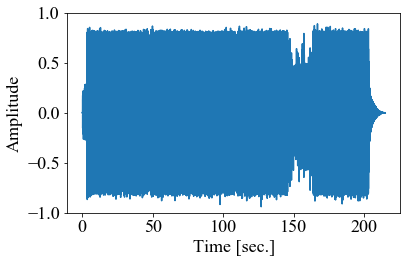

In [50]:
t = np.arange(0, wave.shape[0]/sr, 1/sr)  ### x axis [sec.]
plt.plot(t, wave)           ### x軸: t, y軸: wave
plt.xlabel("Time [sec.]")   ### x軸ラベル
plt.ylabel("Amplitude")     ### y軸ラベル
plt.ylim([-1, 1])           ### y軸表示範囲
plt.tight_layout()          ### 図のサイズをなんかいい感じにする
plt.show()                  ### グラフの表示


## 課題1.2 waveの切り出し（以下のコードに書き込む）

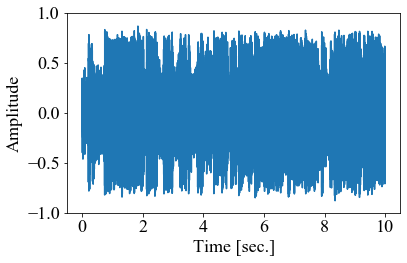

In [51]:
start = 48       ### 切り出し始める時刻[sec.]
duration = 10    ### この課題で扱う曲の長さ[sec.]

####### WRITE HERE ######################################################
####### duration秒切り出すために必要なサンプル数を計算
start_sample = sr*start
dur_length = sr*duration

#########################################################################

t2 = np.arange(0, duration, 1/sr)  ## x axis [sec.]

####### WRITE HERE ######################################################
####### waveの0~dur_length分のデータをwave2に代入
####### あるいは「スライス表記」を用いるとfor文なしでも書ける
wave2=np.zeros(dur_length)
for i in range(dur_length):
    wave2[i]=wave[start_sample+i]
##wave2[0:dur_length]=wave[start_sample:start_sample+dur_length]
    
    

####### 「matplotlibで波形の表示」のコードを参考にwave2のグラフを描画
plt.plot(t2, wave2)           ### x軸: t, y軸: wave2
plt.xlabel("Time [sec.]")   ### x軸ラベル
plt.ylabel("Amplitude")     ### y軸ラベル
plt.ylim([-1, 1])           ### y軸表示範囲
plt.tight_layout()          ### 図のサイズをなんかいい感じにする
plt.show()                  ### グラフの表示

####### 「課題1.1」を参考にwave2をout1_2.wavとして書き出し
### この先何度も書くのめんどいのでこれだけ変数化
output_dir = "wav_data" + os.sep + "output" + os.sep    
output_file = output_dir+"out1_2.wav"
sf.write(output_file, wave2, sr)     ### save output wav
#########################################################################

## STFTによるスペクトログラム表示

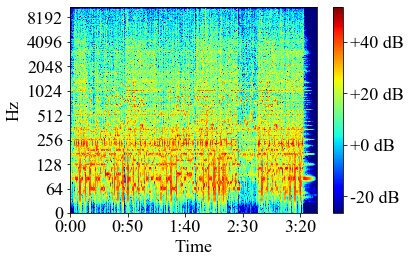

STFT後のサイズ:縦4097，横2312


In [52]:
x = librosa.core.stft(wave, n_fft=fft_num, hop_length=fft_num//4)  ### STFT
x_abs = np.abs(x)  ### 振幅成分の取り出し
x_abs_db = librosa.core.amplitude_to_db(x_abs)  ### db単位へ変換
librosa.display.specshow(x_abs_db, cmap='jet', sr=sr, hop_length=fft_num//4, x_axis='time', y_axis='log')  ### スペクトログラムを表示(y軸を対数軸に変換)
plt.colorbar(format='%+2.0f dB')    ### カラーバーの表示
plt.tight_layout()                  ### 図のサイズをなんかいい感じにする
plt.show()                          ### グラフの表示

print(f"STFT後のサイズ:縦{x.shape[0]}，横{x.shape[1]}")

## 課題1.3 wave2のスペクトログラム

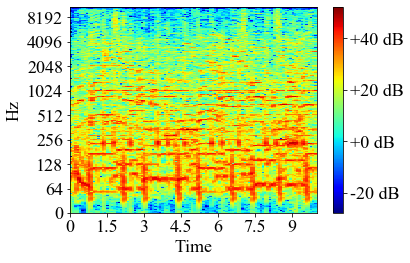

STFT後のサイズ:縦(周波数)4097，横(時刻)108


In [53]:
####### WRITE HERE ######################################################
####### 「STFTによるスペクトログラム表示」を参考にwave2のスペクトログラムを描画
x2 =  librosa.core.stft(wave2, n_fft=fft_num, hop_length=fft_num//4) ### STFT
x_abs2 =  np.abs(x2) ### 振幅成分の取り出し
x_abs_db2 =   librosa.core.amplitude_to_db(x_abs2)### db単位へ変換
librosa.display.specshow(x_abs_db2,cmap='jet',sr=sr,hop_length=fft_num//4,x_axis='time',y_axis='log')  ### スペクトログラムを表示(y軸を対数軸に変換)
plt.colorbar(format='%+2.0f dB')    ### カラーバーの表示
plt.tight_layout()                  ### 図のサイズをなんかいい感じにする
plt.show()                          ### グラフの表

#########################################################################

print(f"STFT後のサイズ:縦(周波数){x2.shape[0]}，横(時刻){x2.shape[1]}")

## 課題1.4 サンプリングレートの変更
サンプリングレートsr \[Hz\]の場合，  
スペクトログラムは0 ~ sr/2 \[Hz\]まで表示(サンプリング定理)  
サンプリングレートを半分にすると，表示できる最大周波数が半分になる．

x3のサイズ:縦(周波数)2049，横(時刻)108


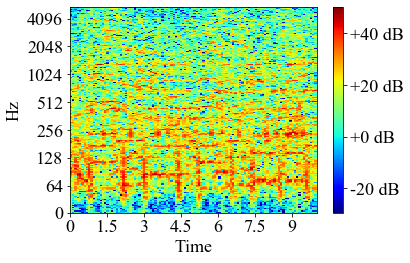

In [54]:
####### サンプリングレート半分
sr3 = sr//2
####### x2のサイズを参考にx3のサイズを決める
x3 = np.zeros((x2.shape[0]//2+1, x2.shape[1]))

print(f"x3のサイズ:縦(周波数){x3.shape[0]}，横(時刻){x3.shape[1]}")

####### WRITE HERE ######################################################
####### x3の各要素にx2を代入
for i in range(x3.shape[0]):
    for j in range(x3.shape[1]):
        x3[i,j]=x2[i,j]


####### あるいは「スライス表記」を用いて↑の3行分を1行で書いても可


#########################################################################


####### x3のスペクトログラムを表示
x_abs3 = np.abs(x3)  ### 振幅成分の取り出し
x_abs_db3 = librosa.core.amplitude_to_db(x_abs3)  ### db単位へ変換
####### ※srとして指定する値に注意する
librosa.display.specshow(x_abs_db3, cmap='jet', sr=sr3, hop_length=fft_num//8, x_axis='time', y_axis='log')  ### スペクトログラムを表示(y軸を対数軸に変換)
plt.colorbar(format='%+2.0f dB')
plt.tight_layout()
plt.show()
   

## 課題1.5 ハイパスフィルタ
1000 Hzくらいより大きい周波数のみ通し，それ以下は0にしたい．  
STFT後の縦サイズによって0~sr/2までの周波数が等分されていることから，  
縦サイズの\[  \]番目以降を残し，それ以下の部分を0にすればよい

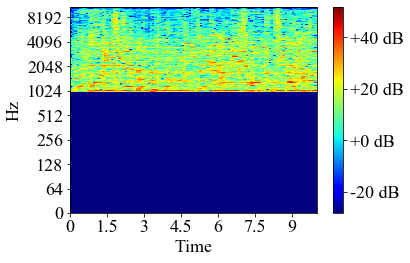

In [60]:
####### x4=x2だとx4の値を変更したときに連動してx2の値も変わる
x4 = x2.copy()

####### WRITE HERE ######################################################
####### ↑の[  ]に入る数字を入れる（四捨五入した整数値）
cut_index = 372

####### x4の該当する要素を0にする（for文あるいはスライス表記）
for i in range(x3.shape[0]):
    for j in range(x3.shape[1]):
        if i<=cut_index:
            x4[i,j]=0

####### x4のスペクトログラムを表示
x_abs4 =   np.abs(x4) ### 振幅成分の取り出し
x_abs_db4 =   librosa.core.amplitude_to_db(x_abs4) ### db単位へ変換
librosa.display.specshow(x_abs_db4,cmap='jet',sr=sr,hop_length=fft_num//4,x_axis='time',y_axis='log')              ### スペクトログラムを表示(y軸を対数軸に変換)
plt.colorbar(format='%+2.0f dB')    ### カラーバーの表示
plt.tight_layout()                  ### 図のサイズをなんかいい感じにする
plt.show()                          ### グラフの表
#########################################################################

## 逆変換(iSTFT)により波形成分を得る

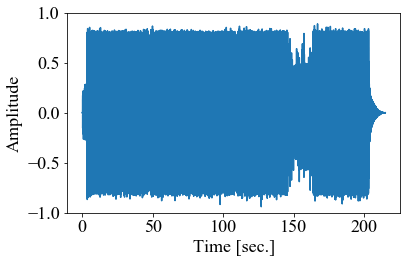

In [56]:
####### iSTFTにより波形に戻す
wave3 = librosa.core.istft(x)

####### wave3の表示
t3 = np.arange(0, wave3.shape[0]/sr, 1/sr)  ## x axis [sec.]
plt.plot(t3, wave3)
plt.xlabel("Time [sec.]")
plt.ylabel("Amplitude")
plt.ylim([-1, 1])
plt.tight_layout()
plt.show()

####### wave3をout1_3.wavとして保存
sf.write(output_dir + os.sep + "out1_3.wav", wave3, sr)

## 課題1.6 x2, x3, x4にiSTFTを施し波形を得る

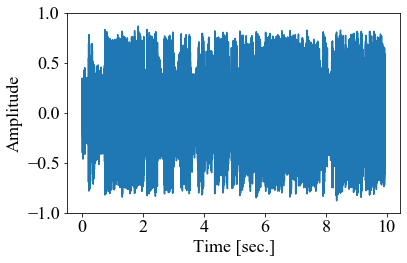

In [57]:
####### WRITE HERE ######################################################
####### 「逆変換(iSTFT)により波形成分を得る」のコードを参考にx2をwave4へiSTFT
wave4 = librosa.core.istft(x2)

####### wave4の波形を表示
t4 = np.arange(0,wave4.shape[0]/sr,1/sr)
plt.plot(t4, wave4)
plt.xlabel("Time [sec.]")
plt.ylabel("Amplitude")
plt.ylim([-1, 1])
plt.tight_layout()
plt.show()

####### wave4をout1_4.wavとして保存
sf.write(output_dir + os.sep + "out1_4.wav", wave4, sr)

#########################################################################

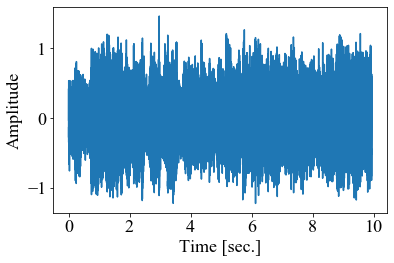

In [58]:
####### WRITE HERE ######################################################
####### x3をwave5へiSTFT
wave5=librosa.core.istft(x3)

####### wave4の波形を表示（※サンプリングレートに注意！）
t5 = np.arange(0,wave5.shape[0]/(sr/2),2/sr)
plt.plot(t5, wave5)
plt.xlabel("Time [sec.]")
plt.ylabel("Amplitude")
# plt.ylim([-1, 1])
plt.tight_layout()
plt.show()

####### wave5をout1_5.wavとして保存（※サンプリングレートに注意！）
sf.write(output_dir + os.sep + "out1_5.wav", wave5, sr//2)

#########################################################################

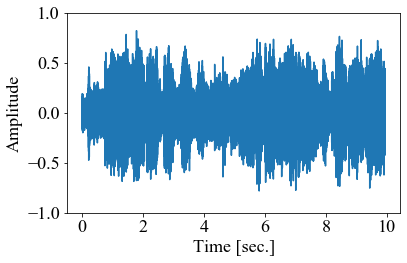

In [61]:
####### WRITE HERE ######################################################
####### x4をwave6へiSTFT
wave6=librosa.core.istft(x4)

####### wave6の波形を表示
t6 = np.arange(0,wave6.shape[0]/sr,1/sr)
plt.plot(t6, wave6)
plt.xlabel("Time [sec.]")
plt.ylabel("Amplitude")
plt.ylim([-1, 1])
plt.tight_layout()
plt.show()

####### wave6をout1_6.wavとして保存
sf.write(output_dir + os.sep + "out1_6.wav", wave6, sr)

#########################################################################